## **YAP 101 Homework-4**  
Due Date: 31 March 2022 23:59

Upload your files to uzak.etu.edu.tr

In [67]:
# Run this cell first. If this library is not installed on your computer, try running "pip install datascience"
from datascience import * 

**Question 1 (5 Points)**. We want to predict energy use of appliances. Please load the hw4.csv data uploaded on uzak.etu system. The data has 11 columns for this task.

date --> time in the format of year-month-day hour:minute:second 

Appliances --> energy use in Wh

lights --> energy use of light fixtures in the house in Wh

T1 --> Temperature in kitchen area, in Celsius

RH_1 --> Humidity in kitchen area, in %

T2 --> Temperature in living room area, in Celsius

RH_2 --> Humidity in living room area, in %

T3 --> Temperature in laundry room area

RH_3 --> Humidity in laundry room area, in %

T4 --> Temperature in office room, in Celsius

RH_4 --> Humidity in office room, in %T

The first 80 percent of the data should be used for training and the other remaning 20 percent should be used for testing.  Divide the data accordingly.

In [68]:
# write your answer here

import numpy as np
import pandas as pd

energy_use = pd.read_csv("hw4.csv")
shuffled = energy_use.sample(energy_use.shape[0],replace=False)
train = shuffled.take(range(int(energy_use.shape[0]*8/10)))
test = shuffled.take(range(int(energy_use.shape[0]*8/10),int(energy_use.shape[0])))

**Question 2 (15 Points)** For each column in the table (except date and Appliances column), calculate the  correlation with Appliances **using the train data**. Print each column name and calculated  correlation.  Do not use any library except numpy and pandas.

In [69]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)

In [70]:
def correlation(t, x, y):
    return np.mean(standard_units(t[x])*standard_units(t[y]))

In [71]:
c = train.columns.values
for i in range(2,11):
    print(c[i],":",correlation(train,"Appliances",c[i]))

lights : 0.3578438427263368
T1 : 0.12170309133524403
RH_1 : 0.012236898982406999
T2 : 0.13456353933867923
RH_2 : -0.13025878887702713
T3 : 0.1201566521469893
RH_3 : 0.007223746246476937
T4 : 0.15044517165116789
RH_4 : -0.07334053353446139


**Question 3 (10 Points)** For the column that has the highest  correlation, calculate the slope and intersept of the linear regression line. 

In [72]:
def slope(t, label_x, label_y):
    r = correlation(t, label_x, label_y)
    return r*np.std(t[label_y])/np.std(t[label_x])

def intercept(t, label_x, label_y):
    return np.mean(t[label_y]) - slope(t, label_x, label_y)*np.mean(t[label_x])

In [73]:
print("Slope :",slope(train,"Appliances","lights"))
print("Intercept :",intercept(train,"Appliances","lights"))

Slope : 0.029438209165539957
Intercept : 2.7108290880640022


**Question 4 (5 Points)** Plot the regression line on a scatter plot.

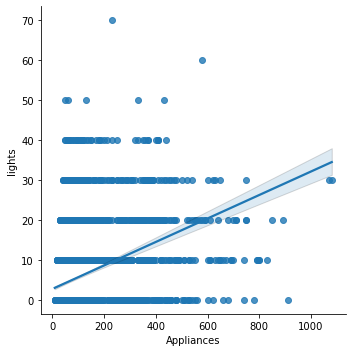

In [74]:
import seaborn as sns
%matplotlib inline

sns.lmplot(x = "Appliances",y = "lights", data = train, fit_reg = True)

**Question 5(5 Points)**. What is the root mean square error for the regression line **using training data**?

In [75]:
x = train["Appliances"].values
y = train["lights"].values
fitted = slope(train,"Appliances","lights")*x + intercept(train,"Appliances","lights")
rmse = (np.mean((y - fitted) ** 2))**0.5

print("RMSE :",rmse)


RMSE : 8.82148103836797


**Question 6 (20 Points)** For each column, try to fit a non-linear regression line (ax2 + bx + c) and calculate their rmse scores **using training data**.

In [76]:
def rmse_for_column(col):
    def rmse_nonlinear(a,b,c):
        x  = train["Appliances"]
        y  = train[col]
        fitted = a*x*x + b*x + c
        return np.mean((y-fitted) ** 2) ** 0.5
    return rmse_nonlinear

for i in train.columns.values[2:]:
    temp = rmse_for_column(i)
    [a,b,c]= minimize(temp)
    print(i,":",temp(a,b,c))

lights : 8.595406987743376
T1 : 1.4899005540556485
RH_1 : 3.0148668549765794
T2 : 1.5596110370848217
RH_2 : 2.5528683232309453
T3 : 1.4018153105256512
RH_3 : 2.2944296463420013
T4 : 1.5093877941523002
RH_4 : 3.494898676251611


**Question 7(10 Points)**. **On test set**, find rmse value using the linear regression line you found in Question 3 

In [77]:
def rmse(a,b):
    x  = train["Appliances"]
    y  = train["lights"]
    fitted = a*x + b
    return np.mean((y-fitted) ** 2) ** 0.5

[a,b] = minimize(rmse)

temp = (np.array(test["lights"])-(np.array(test["Appliances"])*a + b))**2

print("rmse :", np.mean(temp)**0.5)

rmse : 9.14843667067245


**Question 8 (10 Points)**. **On test set**, find rmse value using the non-linear regression line you found in Question 6 with the lowest rmse score.

In [78]:
temp = rmse_for_column("T3")
[a,b,c]= minimize(temp)
x = np.array(test["Appliances"])
y = np.array(test["T3"])

fitted = a*x*x + b*x + c
temp = np.mean((y-fitted)**2)**0.5

print("rmse for non_linear regression line :",temp)

rmse for non_linear regression line : 1.3747631720080642


**Question 9 (15 Points)**. You will predict the appliances value using a linear regression model with two different features. That is, your prediction function will be like this: f(x1,x2) = ax1 + bx2 +c 
Find the x1 and x2 feature pair which yields the lowest rmse score on **the train set**.



In [79]:
def rmse_for_columns(col1,col2,df):
    def rmse_linear(a,b,c):
        x1  = df[col1]
        x2  = df[col2]
        y = df["Appliances"]
        fitted = a*x1 + b*x2 + c
        return np.mean((y-fitted) ** 2) ** 0.5
    return rmse_linear

In [80]:
min_rmse = 10000
min_cols = []
col = train.columns
for i in range(2,train.shape[1]):
    for j in range(i+1,train.shape[1]):
        temp = rmse_for_columns(col[i],col[j],train)
        [a,b,c] = minimize(temp)
        if temp(a,b,c) < min_rmse:
            if len(min_cols) == 1:
                min_cols.pop(0) 
            min_cols.append([col[i],col[j]])

In [81]:
min_cols

[['T4', 'RH_4']]

**Question 10 (5 Points)**. Find the rmse value of the linear regression model you find in Question 9 on the **test set**.

In [82]:
emp = rmse_for_columns("T4","RH_4",test)
[a,b,c] = minimize(temp)
temp(a,b,c)

113.24571867268003